In [3]:
import pandas as pd

In [6]:
loans=pd.read_csv('../data/lpetrocelli-czech-financial-dataset-real-anonymized-transactions/loan.csv', delimiter=';')

In [51]:
loans['IS_PAID'] = loans['status'].isin(['A', 'C']).astype(float)

In [61]:
X = loans[['amount', 'duration', 'payments']]
X
y = loans[['IS_PAID']]
y

,IS_PAID
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
677,1.0
678,1.0
679,1.0
680,1.0


In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [63]:
def df_to_tensor(df):
    device = get_device()
    return torch.from_numpy(df.values).float().to(device)
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU 
    return device

In [93]:
indata = df_to_tensor(X)
labels = torch.from_numpy(y.to_numpy()).float().to(get_device())
#labels

In [115]:


class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.linear1 = torch.nn.Linear(3, 200)
        
        self.linear2 = torch.nn.Linear(200, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.linear1(x)
        # x = self.activation(x)
        x = self.linear2(x)
        x = self.sigmoid(x)
        return x
model = TinyModel().to(get_device())

In [116]:
y_pred.shape

torch.Size([682, 5])

In [143]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
epochs = 100
#List to store losses
losses = []
for i in range(epochs):
    #Precit the output for Given input
    y_pred = model.forward(indata)
    #Compute Cross entropy loss
    loss = loss_fn(y_pred,labels)
    #Add loss to the list
    losses.append(loss.item())
    #Clear the previous gradients
    optimizer.zero_grad()
    #Compute gradients
    loss.backward()
    #Adjust weights
    optimizer.step()


In [144]:
y_pred.shape

torch.Size([682, 1])

In [145]:
import matplotlib.pyplot as plt

In [146]:
#y_pred

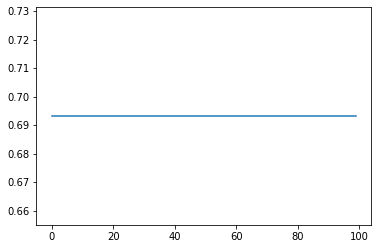

In [147]:
plt.plot(losses)

In [134]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

In [130]:
clf = MLPClassifier()

In [131]:
clf.fit(X, y)

/home/emil/.local/share/virtualenvs/masters--_fQS0pJ/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier()

In [136]:
roc_auc_score(y, clf.predict(X))

0.5357173875282264